In [9]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load the Dataset
df=pd.read_csv('Mall_Customers.csv')

# Display the First Few row of Dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# Dimension of Dataset
print(f'Dimension of dataset :{df.shape}')

Dimension of dataset :(200, 5)


In [15]:
# Summary Statistics
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
# Display Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
# Checking Missing Values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
# Dropping unnecessary column
df=df.drop('CustomerID',axis=1)

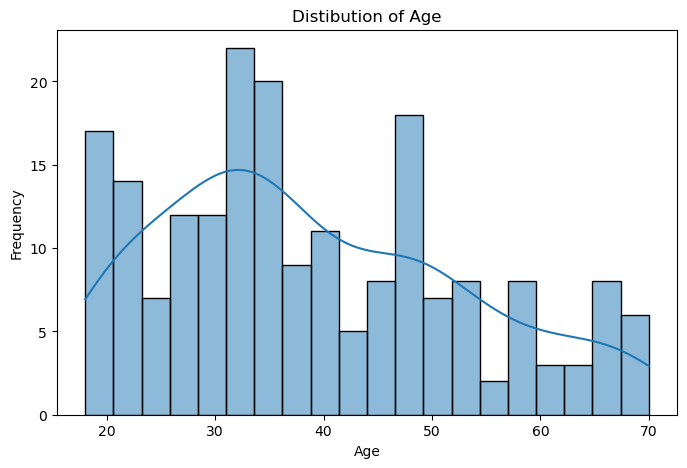

In [23]:
# Visualizing the Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],kde=True,bins=20)
plt.title('Distibution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

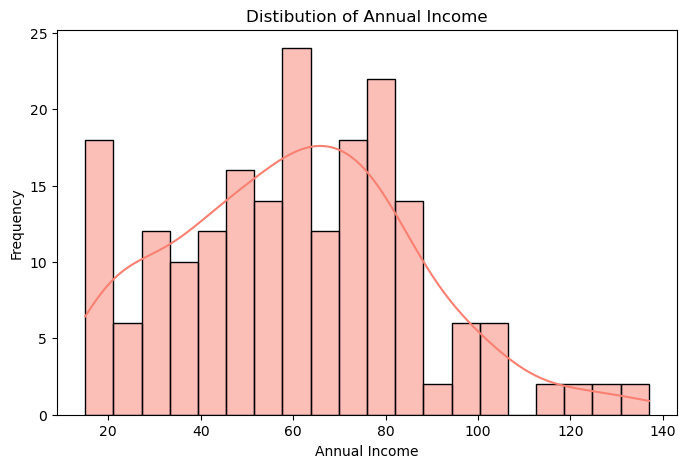

In [25]:
# Visualizing the Distribution of Annual Income (k$)
plt.figure(figsize=(8,5))
sns.histplot(df['Annual Income (k$)'],kde=True,bins=20,color='salmon')
plt.title('Distibution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

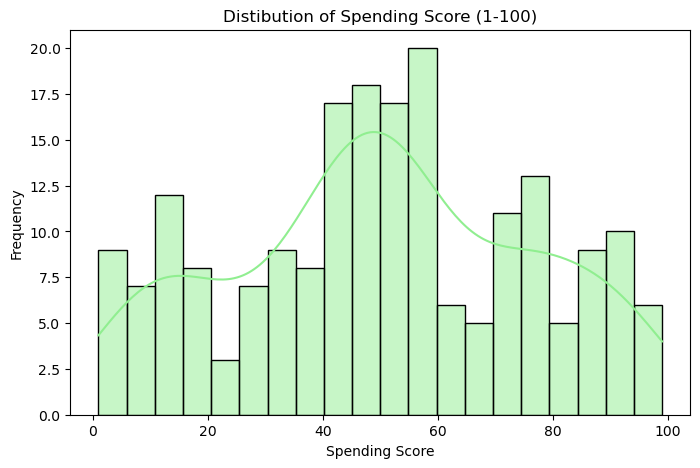

In [26]:
# Visualizing the Distribution of Spending Score (1-100)
plt.figure(figsize=(8,5))
sns.histplot(df['Spending Score (1-100)'],kde=True,bins=20,color='lightgreen')
plt.title('Distibution of Spending Score (1-100)')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()